In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn  as sns


encoder=LabelEncoder()
data= pd.read_csv('data.csv')
data["TotalCharges"] = data["TotalCharges"].str.strip()  # enlever espaces
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors="coerce")

# data
data.info()
# data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [2]:
print(data.duplicated().sum())
data=data.drop_duplicates()


0


In [3]:
# print(data.isnull().sum())
# data=data.dropna()
print(data["TotalCharges"].mean())
data["TotalCharges"].fillna(data["TotalCharges"].mean(),inplace=True)
# data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors="coerce")
print(data.dtypes)



2283.3004408418656
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


C:\Users\HP\AppData\Local\Temp\ipykernel_7472\652160368.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["TotalCharges"].fillna(data["TotalCharges"].mean(),inplace=True)


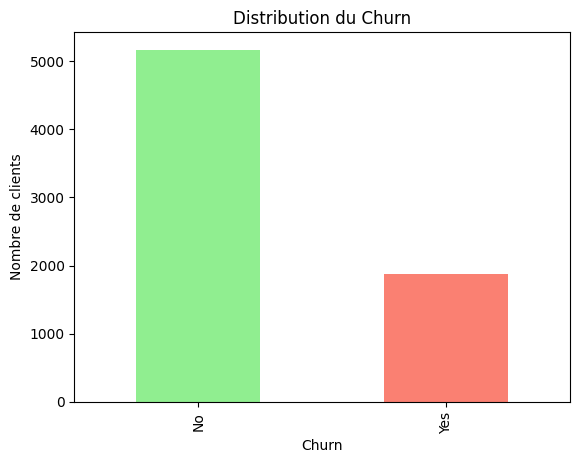

In [4]:
# visualisations
#Analyse univariée
churn_count=data['Churn'].value_counts()
churn_count.plot(kind='bar',color=['lightgreen','salmon'])
plt.title("Distribution du Churn")
plt.xlabel("Churn")
plt.ylabel("Nombre de clients")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_7472\3203779983.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:skyblue'` for the same effect.

  sns.countplot(x='Contract',hue='Churn',data=data,color='skyblue')


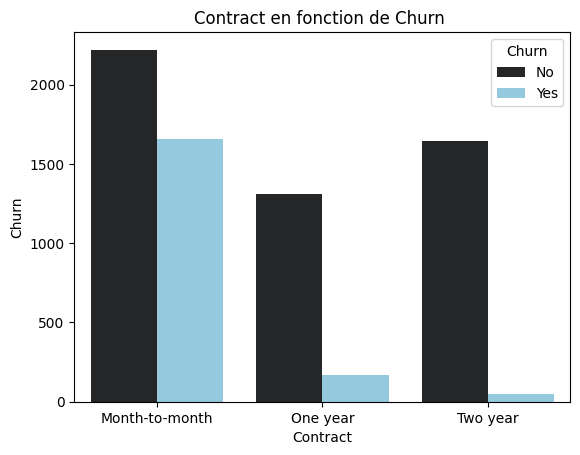

In [5]:
# countplot 
sns.countplot(x='Contract',hue='Churn',data=data,color='skyblue')

plt.title("Contract en fonction de Churn ")
plt.xlabel("Contract")
plt.ylabel("Churn")
plt.show()


In [6]:
data.to_csv("data_clean.csv", index=False)


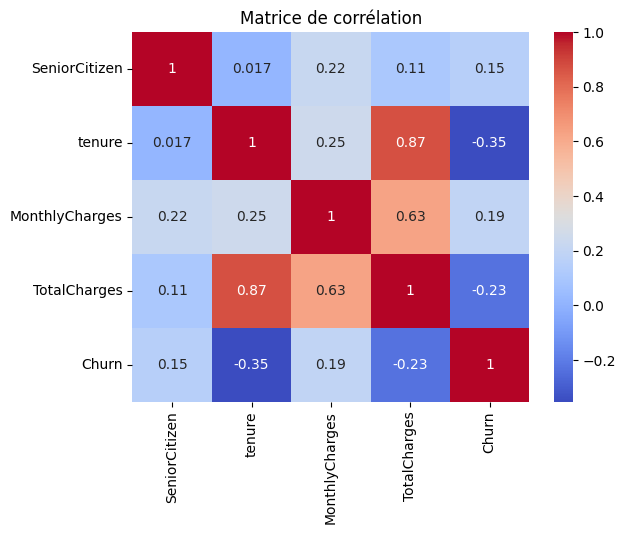

In [7]:
#corrilation
data['Churn'] = encoder.fit_transform(data["Churn"])
data['TotalCharges']=encoder.fit_transform(data["TotalCharges"])
col=data.select_dtypes(include=["int64","float64"])

sns.heatmap(col.corr(),annot=True,cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.show()


In [8]:
encoder=LabelEncoder()

cols = [
    'gender','Partner' ,'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
    'PaymentMethod', 'Churn'
]

for col in cols:
    data[col] = encoder.fit_transform(data[col])
    # print( data[col + '_num'] )
    cols_lists= data[col].tolist()
    print(cols_lists)


[0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 